In [9]:
import numpy as np
from decision_tree import DecisionTree
import matplotlib.pyplot as plt

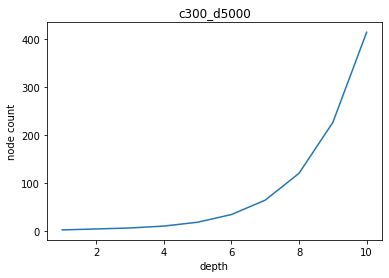

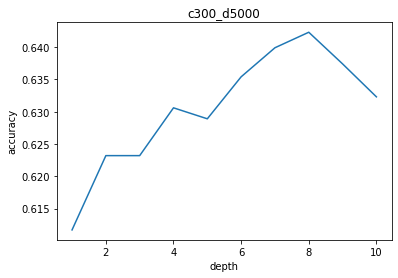

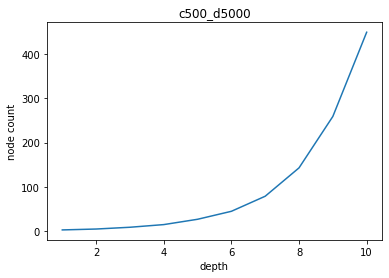

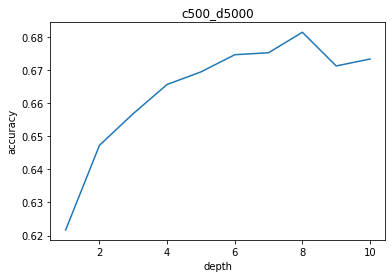

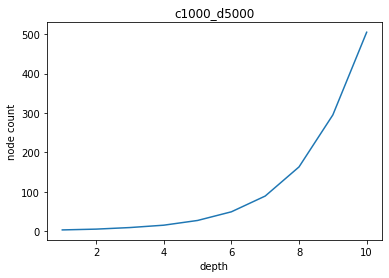

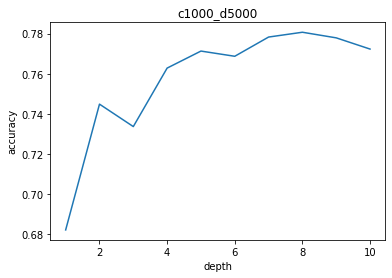

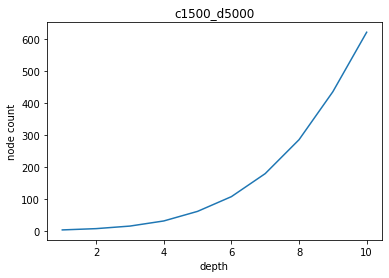

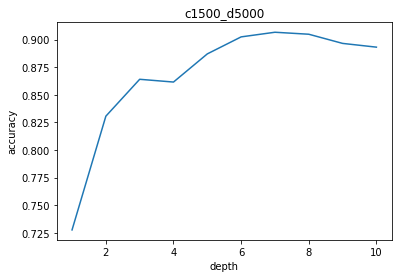

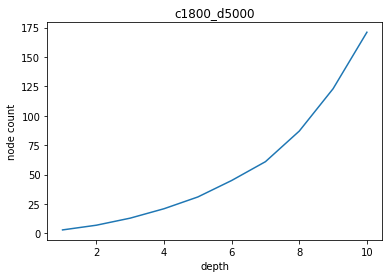

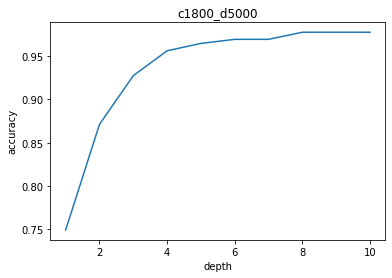

In [13]:
id3 = DecisionTree(DecisionTree.Mode.Entropy)
for c in [300, 500, 1000, 1500, 1800]:
    for s in [5000]:
        train_data = np.loadtxt(f"data/train_c{c}_d{s}.csv", delimiter=",", dtype="int")
        test_data = np.loadtxt(f"data/test_c{c}_d{s}.csv", delimiter=",", dtype="int")
        valid_data = np.loadtxt(f"data/valid_c{c}_d{s}.csv", delimiter=",", dtype="int")
        id3.train(train_data)
        depth_arr = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
        nodes = []
        accuracy = []
        for depth in depth_arr:
            id3.depth_based_prune_dfs(id3.root, depth)
            nodes.append(DecisionTree.getBasicInfo(id3.root, {})["total"])
            accuracy.append(id3.test(valid_data))
        
        plt.plot(depth_arr, nodes, label="node count")
        plt.title(f"c{c}_d{s}")
        plt.xlabel('depth')
        plt.ylabel('node count')
        plt.show()
        
        plt.plot(depth_arr, accuracy, label="accuracy")
        plt.title(f"c{c}_d{s}")
        plt.xlabel('depth')
        plt.ylabel('accuracy')
        plt.show()